In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

read all files in the perf subdirectory and put them into a list

In [3]:
directory = 'perf'
file_names = os.listdir(directory)
file_names.sort()

each file in file_names has 12 rows. Read those files and pivot each to generate 1 row per file in the dataframe with 12 columns

In [4]:
data_frames = []

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path, header=None)
    df.iloc[0] = file_name
    data_frames.append(df)
combined_df = pd.concat(data_frames, axis=1).T


In [5]:
combined_df.shape

(163800, 2)

In [1]:
combined_df.head(5)

NameError: name 'combined_df' is not defined

In [13]:
combined_df.columns = ['file_name', 'outcome', 'drop1', 'nControlled', 'pctControlled', 'nTested', 'drop2', 'nBestMedControlled', 'drop3','pctChange', 'drop4', 'cpuMin' ]

In [14]:
combined_df = combined_df.filter(regex='^(?!drop)')

In [15]:
combined_df.head()

,file_name,outcome,nControlled,pctControlled,nTested,nBestMedControlled,pctChange,cpuMin
0,0000_ns_000_2017_01_02_best_meds_perf_controll...,controlled_12mon,37,45.68,81,58,25.93,0.1
0,0000_ns_001_2017_01_02_best_meds_perf_controll...,controlled_12mon,27,30.0,90,54,30.0,0.03
0,0000_ns_002_2017_01_02_best_meds_perf_controll...,controlled_12mon,28,34.15,82,48,24.39,0.03
0,0000_ns_003_2017_01_02_best_meds_perf_controll...,controlled_12mon,36,44.44,81,55,23.46,0.03
0,0000_ns_004_2017_01_02_best_meds_perf_controll...,controlled_12mon,43,46.24,93,60,18.28,0.03


In [16]:
combined_df['t'] = combined_df['file_name'].str[:4]
combined_df['nsample'] = combined_df['file_name'].str[8:11]
combined_df['date'] = combined_df['file_name'].str[12:22].replace('_', '-')
combined_df['date'] = combined_df['date'].str.replace('_', '-')
combined_df['t'] = combined_df['t'].astype(int)
combined_df['nsample'] = combined_df['nsample'].astype(int)
combined_df['pctChange'] = combined_df['pctChange'].astype(float)

In [17]:
combined_df.head()

,file_name,outcome,nControlled,pctControlled,nTested,nBestMedControlled,pctChange,cpuMin,t,nsample,date
0,0000_ns_000_2017_01_02_best_meds_perf_controll...,controlled_12mon,37,45.68,81,58,25.93,0.1,0,0,2017-01-02
0,0000_ns_001_2017_01_02_best_meds_perf_controll...,controlled_12mon,27,30.0,90,54,30.00,0.03,0,1,2017-01-02
0,0000_ns_002_2017_01_02_best_meds_perf_controll...,controlled_12mon,28,34.15,82,48,24.39,0.03,0,2,2017-01-02
0,0000_ns_003_2017_01_02_best_meds_perf_controll...,controlled_12mon,36,44.44,81,55,23.46,0.03,0,3,2017-01-02
0,0000_ns_004_2017_01_02_best_meds_perf_controll...,controlled_12mon,43,46.24,93,60,18.28,0.03,0,4,2017-01-02


In [18]:
combined_df.shape

(23400, 11)

In [19]:

grouped_df = combined_df.groupby(['t','date'])['pctChange'].mean().reset_index()
grouped_df.head()

,t,date,pctChange
0,0,2017-01-02,19.4724
1,1,2017-01-09,20.8624
2,2,2017-01-16,16.8693
3,3,2017-01-23,23.7006
4,4,2017-01-30,20.8715


In [20]:
avg_impact = round(grouped_df['pctChange'].mean(), 2)


In [21]:
average_pctChange = "Mean % Impact: " + str(avg_impact)
average_pctChange


'Mean % Impact: 23.5'

with grouped_df use seaborn to create a time series plot with date on the horizontal axis and pctChange on the vertical axis. Angle the date labels at 45 degrees. Display the plot and write it to a png file in the plots subdirectory. the suptitle should be "Impact vs Time". the title should be the variable average_pctChange. the minimum y scale should be 14 and the maximum y scale should be 36. The x axis should display at most 10 dates. The line plot should also have dots for every date point. the font size should be slightly larger than the default for all labels. add a horizontal green line at avg_impact. Add a purple line showing the regression of the time series where x = 't'. the margin on the bottom should be twice as big as the default margin.

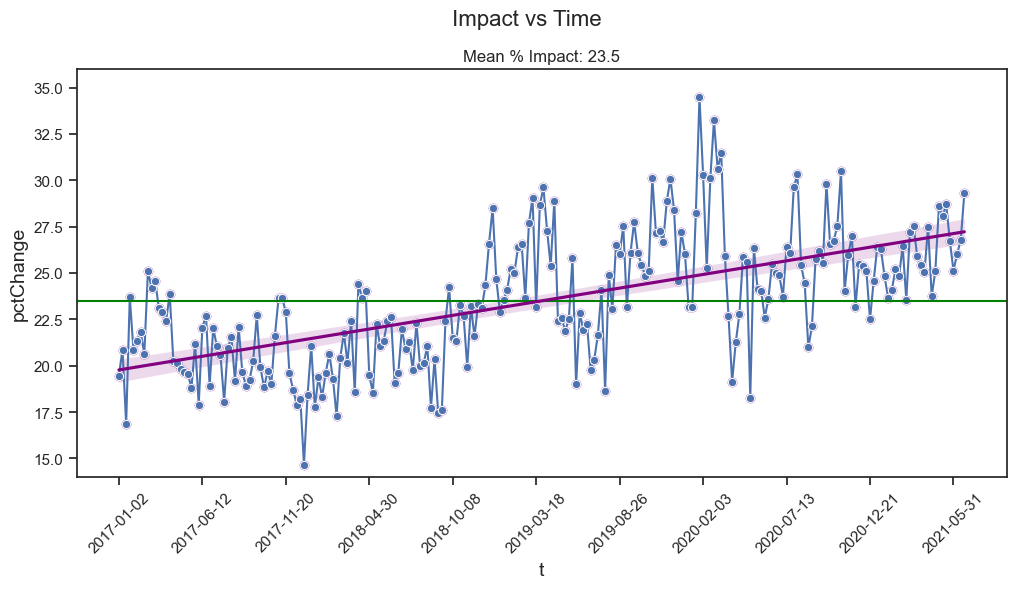

In [45]:
# Set the style of the plot
sns.set(style="ticks")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='date', y='pctChange', marker='o')

# Set the title and axis labels with slightly larger font size
plt.suptitle("Impact vs Time", fontsize=16)
plt.title(average_pctChange)
plt.xlabel("Date", fontsize=14)
plt.ylabel("% Change", fontsize=14)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(14, 36)

# Show at most 10 x-axis labels
n = len(grouped_df['date'])
step = n // 10
plt.xticks(range(0, n, step))

# Add a horizontal green line at avg_impact
plt.axhline(y=avg_impact, color='green')

# Add a purple line showing the regression of the time series
sns.regplot(data=grouped_df, x='t', y='pctChange', color='purple')

# Set the bottom margin to be twice as big as the default margin
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the "plots" subdirectory
plt.savefig('plots/impact_vs_time.png')

# Display the plot
plt.show()


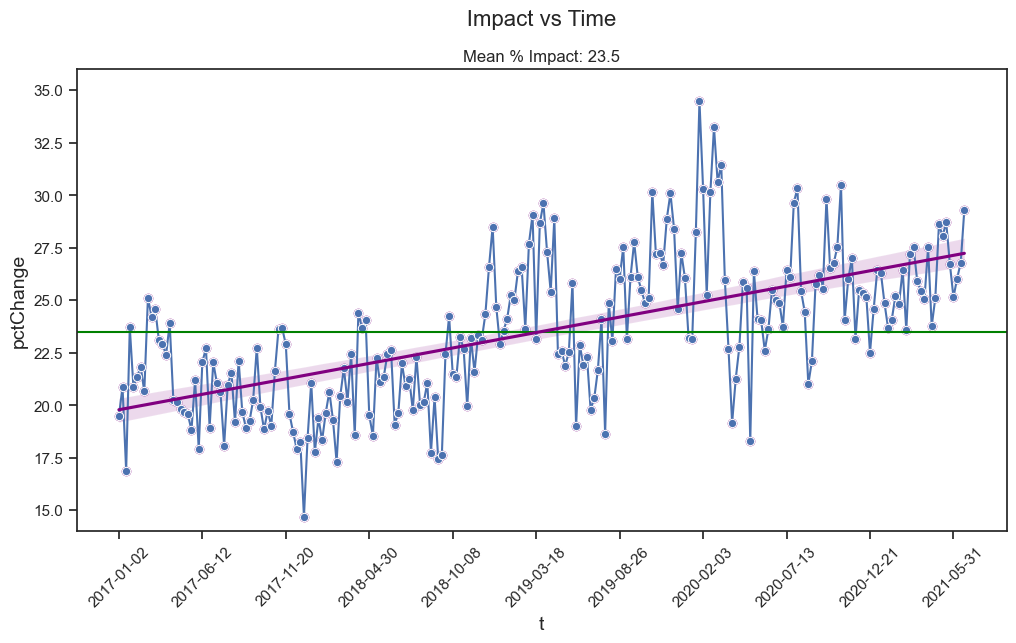

In [43]:
# Set the style of the plot
sns.set(style="ticks")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='date', y='pctChange', marker='o')

# Set the title and axis labels with slightly larger font size
plt.suptitle("     Impact vs Time", fontsize=16)
plt.title(average_pctChange)
plt.xlabel("Date", fontsize=14)
plt.ylabel("% Change", fontsize=14)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(14, 36)

# Show at most 10 x-axis labels
n = len(grouped_df['date'])
step = n // 10
plt.xticks(range(0, n, step))

# Add a horizontal green line at avg_impact
plt.axhline(y=avg_impact, color='green')

# Add a purple line showing the regression of the time series
sns.regplot(data=grouped_df, x='t', y='pctChange', color='purple')

# Save the plot as a PNG file in the "plots" subdirectory
plt.savefig('plots/impact_vs_time.png')

# Display the plot
plt.show()


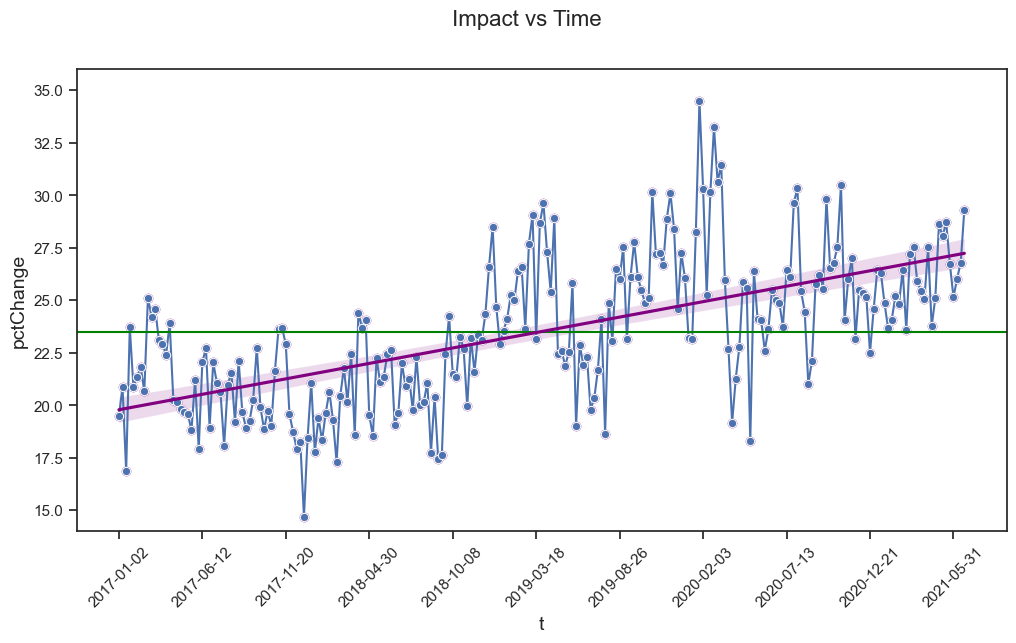

In [39]:
# Set the style of the plot
sns.set(style="ticks")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='date', y='pctChange', marker='o')

# Set the title and axis labels with slightly larger font size
plt.suptitle("Impact vs Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("% Change", fontsize=14)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(14, 36)

# Show at most 10 x-axis labels
n = len(grouped_df['date'])
step = n // 10
plt.xticks(range(0, n, step))

# Add a horizontal green line at avg_impact
plt.axhline(y=avg_impact, color='green')

# Add a purple line showing the regression of the time series
sns.regplot(data=grouped_df, x='t', y='pctChange', color='purple')

# Save the plot as a PNG file in the "plots" subdirectory
plt.savefig('plots/impact_vs_time.png')

# Display the plot
plt.show()


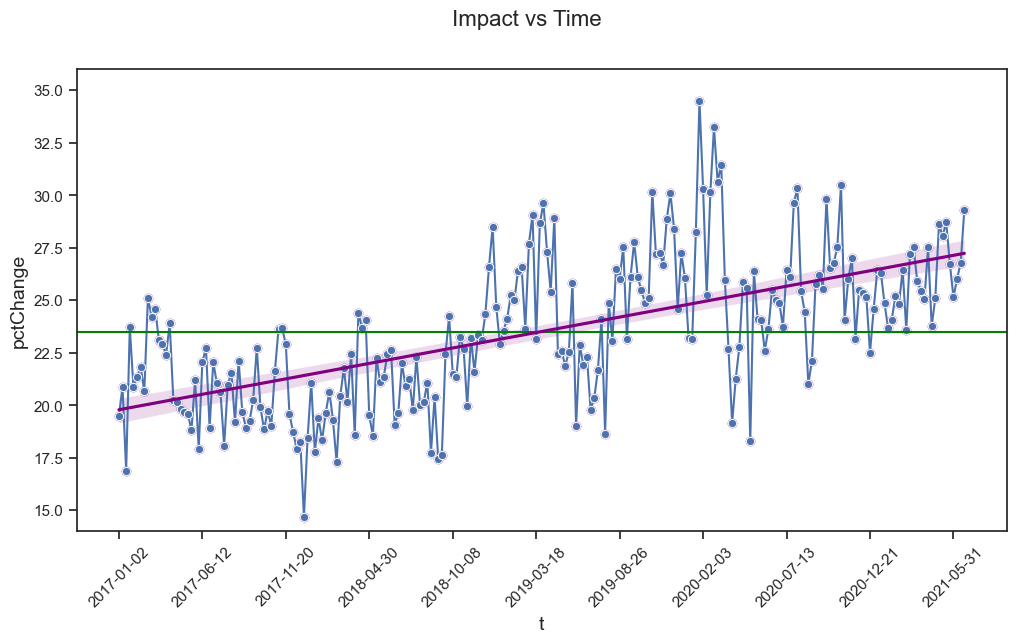

In [36]:
# Set the style of the plot
sns.set(style="ticks")

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='date', y='pctChange', marker='o')

# Set the title and axis labels with slightly larger font size
plt.suptitle("Impact vs Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("% Change", fontsize=14)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis limits
plt.ylim(14, 36)

# Show at most 10 x-axis labels
n = len(grouped_df['date'])
step = n // 10
plt.xticks(range(0, n, step))

# Add a horizontal green line at avg_impact
plt.axhline(y=avg_impact, color='green')

# Add a purple line showing the regression of the time series
sns.regplot(data=grouped_df, x='t', y='pctChange', color='purple')

# Save the plot as a PNG file in the "plots" subdirectory
plt.savefig('plots/impact_vs_time.png')

# Display the plot
plt.show()
